# Bezier curve for physics, attempt 1

We try and solve a simple spring-mass system, using multiple methods

In [91]:
import numpy as np
from matplotlib.pyplot import *

In [92]:
mass = 1.0
springK = 1.0

omega = np.sqrt(springK/mass)
period = 2.0 * np.pi / omega
steps = 20

deltaT = period / steps
numPeriods = 3

N = int(numPeriods * steps)

tVisual = np.arange(0.0, numPeriods * steps) * deltaT

First we can create our analytical solution

In [93]:
xAnalytical = np.cos(omega * tVisual)
vAnalytical = -np.sin(omega * tVisual)
# plot(tVisual / period, xAnalytical)
# plot(tVisual / period, vAnalytical)
# show()

Then, we can create our run-of-the-mill, semi-implicit euler solution

In [94]:
xEuler = [1.0]
vEuler = [0.0]

for i in range(1, N):
    vEuler.append(vEuler[i-1] + (-springK * xEuler[i-1]) * deltaT)
    xEuler.append(xEuler[i-1] + vEuler[i] * deltaT)

# plot(tVisual / period, xEuler)
# plot(tVisual / period, vEuler)
# show()

Finally, we can prepare our data for the bezier curve method

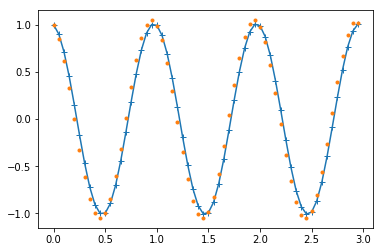

In [95]:
xBezier = [1.0]
vBezier = [0.0]
bBezier = []

for n in range(0, N-1):
    
    xn = xBezier[n]
    vn = vBezier[n]
    an = -springK * xBezier[n]
    
    b0 = xBezier[n]
    b2 = xn + vn * deltaT + an * deltaT**2.0
    b1 = xn + 0.5 * vn * deltaT
    
    v = (1.0/deltaT) * (b2 - b0)
    
    xBezier.append(b2)
    vBezier.append(v)
    bBezier.append(b1)
    
#     vBezier.append(vBezier[i-1] + (-springK * xBezier[i-1]) * deltaT)
#     xBezier.append(xBezier[i-1] + vBezier[i] * deltaT)
#     bBezier.append(xBezier[i-1] + 0.5 * vBezier[i-1] * deltaT)
    
bBezier.append(bBezier[-1])

plot(tVisual / period, xBezier, '+-')
plot(tVisual / period, bBezier, '.')
show()

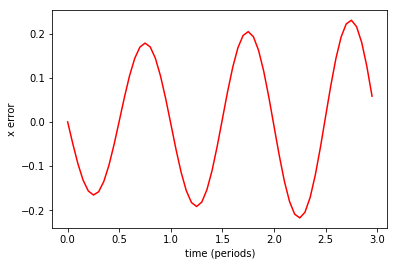

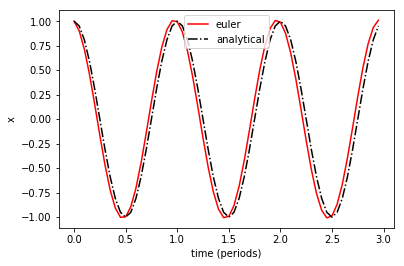

In [96]:
xErr2 = (xEuler - xAnalytical)
vErr2 = (vEuler - vAnalytical)

figure()
plot(tVisual/period, xErr2, 'r', label = 'position error')
xlabel('time (periods)')
ylabel('x error')

figure()
plot(tVisual/period, xEuler, 'r', label = 'euler')
plot(tVisual/period, xAnalytical, 'k-.', label = 'analytical')
xlabel('time (periods)')
ylabel('x')
legend()
show()

## Interpolation

Now we can interpolate between our points to get nicer curves. We use two methods:

 * basic interpolation (x = x0 + hv0)
 * euler-based interpolation

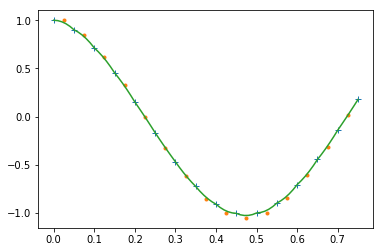

In [99]:
substeps = 5

xInterp = []
tInterp = []

for step in range(1, N):
    
    tn = tVisual[step-1]
    b0 = xBezier[step-1]
    b2 = xBezier[step]
    b1 = bBezier[step-1]
    
    temp = []
    tempT = []
    
    temp.append(b0)
    tempT.append(tn)
    for i in range(1, substeps):
        t0 = i / float(substeps)
        
        r = b1 + (1-t0)**2 * (b0 - b1) + t0**2*(b2-b1)
#         r = (1.0 - t0)**2.0 * b0 + t0*(1.0 - t0) * b1 + t0**2.0 * b2
        tempT.append(tn + t0 * deltaT) #r[0])
        temp.append(r)
    
    xInterp += temp
    tInterp += tempT


zoom = 15
    
tt = (tVisual / period)[0:zoom+1]
tbt = ((tVisual + 0.5 * deltaT) / period)[0:zoom]
tti = (tInterp / period)[0:zoom*substeps+1]

plot(tt, xBezier[0:zoom+1], '+')
plot(tbt, bBezier[0:zoom], '.')
plot(tti, xInterp[0:zoom*substeps+1])
show()